### import libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

### Data Representation

In [2]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.index

RangeIndex(start=0, stop=918, step=1)

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [8]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [10]:
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
563,55,M,ASY,135,204,1,ST,126,Y,1.1,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0
546,48,M,NAP,132,220,1,ST,162,N,0.0,Flat,1
571,69,M,ASY,140,110,1,Normal,109,Y,1.5,Flat,1
858,62,F,ASY,140,268,0,LVH,160,N,3.6,Down,1


In [11]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

**Missing Values**

In [12]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

**Duplicates**

In [13]:
df.duplicated().sum()

0

**Outliers**

In [14]:
df.MaxHR.describe()

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

In [15]:
Q1 = df['MaxHR'].quantile(0.25)
Q3 = df['MaxHR'].quantile(0.75)
IQR = Q3 - Q1

In [16]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [17]:
df[(df['MaxHR'] < lower_bound) | (df['MaxHR'] > upper_bound)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
370,60,M,ASY,135,0,0,Normal,63,Y,0.5,Up,1
390,51,M,ASY,140,0,0,Normal,60,N,0.0,Flat,1


In [18]:
Outliers = df[(df['MaxHR'] < lower_bound) | (df['MaxHR'] > upper_bound)].index

In [19]:
Outliers

Index([370, 390], dtype='int64')

**STD**

In [20]:
Outliers_list = []

In [21]:
Outliers_STD_upper_bound = df.MaxHR.mean() + (3 * df.MaxHR.std() )
Outliers_STD_upper_bound

213.19037060647202

In [22]:
df[df.MaxHR > Outliers_STD_upper_bound ]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [23]:
Outliers_list.append(df[df.MaxHR > Outliers_STD_upper_bound ].index)

In [24]:
Outliers_STD_lower_bound = df.MaxHR.mean() - (3 * df.MaxHR.std() )
Outliers_STD_lower_bound

60.428365776970224

In [25]:
df[df.MaxHR < Outliers_STD_lower_bound ]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
390,51,M,ASY,140,0,0,Normal,60,N,0.0,Flat,1


In [26]:
Outliers_list.append(df[df.MaxHR < Outliers_STD_lower_bound ].index)

In [27]:
print(Outliers_list)

[Index([], dtype='int64'), Index([390], dtype='int64')]


**delete outliers**

In [28]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [29]:
df.drop(index= Outliers , inplace= True)

In [30]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [31]:
df.Age.min()

28

In [32]:
df.Age.max()

77

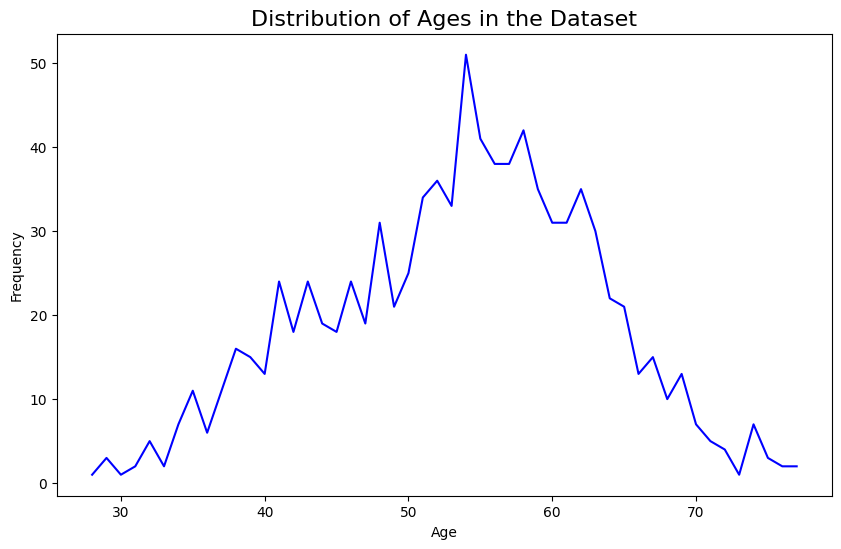

In [33]:
age_counts = df['Age'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(age_counts.index, age_counts.values, color='blue')
plt.title('Distribution of Ages in the Dataset', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [34]:
df['Age'].value_counts()

Age
54    51
58    42
55    41
56    38
57    38
52    36
62    35
59    35
51    34
53    33
60    31
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: count, dtype: int64

In [35]:
df['Age'].value_counts().head(7)

Age
54    51
58    42
55    41
56    38
57    38
52    36
62    35
Name: count, dtype: int64

In [36]:
df['Age'].value_counts().sort_index()

Age
28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    21
50    25
51    34
52    36
53    33
54    51
55    41
56    38
57    38
58    42
59    35
60    31
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
Name: count, dtype: int64

In [37]:
df['Age'].value_counts().sum()

916

In [38]:
df['Age'].value_counts().max()

51

In [39]:
df['Age'].value_counts().min()

1

In [40]:
df['Age'].value_counts().mean()

18.32

In [41]:
df['Age'].value_counts().std()

13.444428327795292

In [42]:
df['Age'].value_counts().describe()

count    50.000000
mean     18.320000
std      13.444428
min       1.000000
25%       6.250000
50%      17.000000
75%      30.750000
max      51.000000
Name: count, dtype: float64

In [43]:
df['Sex'].value_counts()

Sex
M    723
F    193
Name: count, dtype: int64

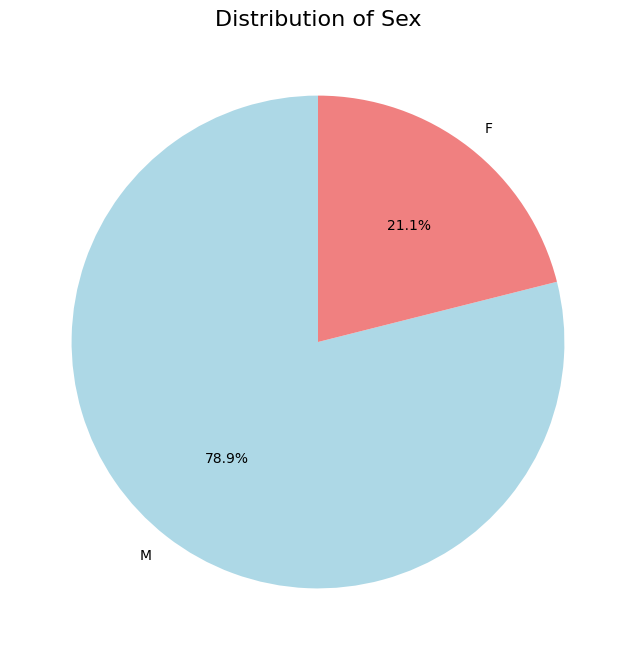

In [44]:
sex_counts = df['Sex'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Sex', fontsize=16)
plt.show()

In [45]:
df['Sex'].value_counts(normalize=True) * 100

Sex
M    78.930131
F    21.069869
Name: proportion, dtype: float64

In [46]:
df['ChestPainType'].value_counts().count()

4

In [47]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [48]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    494
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

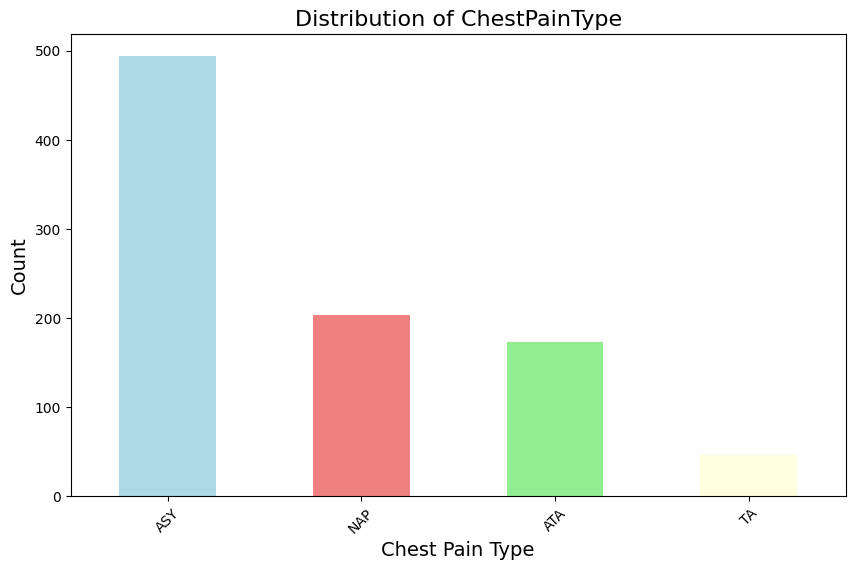

In [49]:
chest_pain_counts = df['ChestPainType'].value_counts()
plt.figure(figsize=(10, 6))
chest_pain_counts.plot(kind='bar', color=['lightblue', 'lightcoral', 'lightgreen', 'lightyellow'])
plt.title('Distribution of ChestPainType', fontsize=16)
plt.xlabel('Chest Pain Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation = 45)
plt.show()

TA: Typical Angina             الذبحة الصدرية النموذجية  \n  
ATA: Atypical Angina           الذبحة الصدرية غير النموذجية  \n  
NAP: Non-Anginal Pain          الم غير ذبحي صدري  \n  
ASY: Asymptomatic              بدون أعراض  \n  
  


In [50]:
# resting blood pressure
df['RestingECG'].value_counts()

RestingECG
Normal    550
LVH       188
ST        178
Name: count, dtype: int64

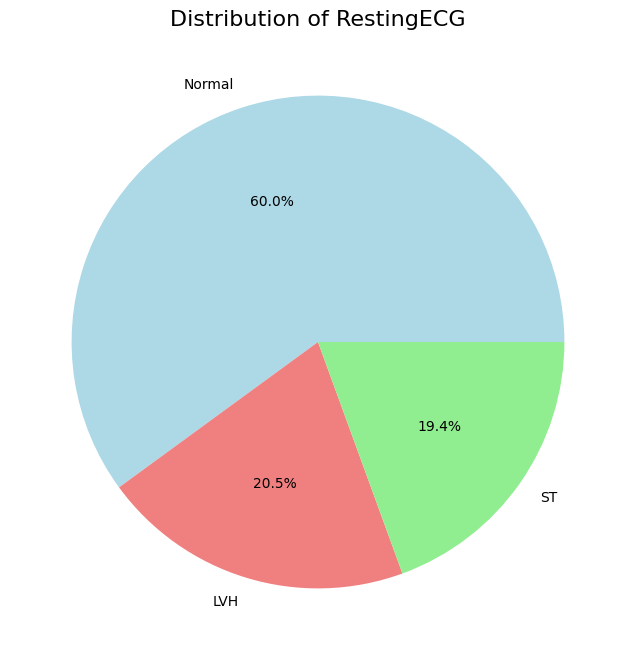

In [51]:
resting_ecg_counts = df['RestingECG'].value_counts()
plt.figure(figsize=(8, 8))
resting_ecg_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'lightgreen'])

plt.title('Distribution of RestingECG', fontsize=16)

plt.ylabel('')
plt.show()

In [52]:
# Cholesterol
df['Cholesterol'].value_counts().describe()

count    222.000000
mean       4.126126
std       11.427218
min        1.000000
25%        1.000000
50%        3.000000
75%        5.000000
max      170.000000
Name: count, dtype: float64

In [53]:
# fasting blood sugar
# 1: if FastingBS > 120 mg/dl
# 0: otherwise
df['FastingBS'].value_counts()

FastingBS
0    702
1    214
Name: count, dtype: int64

In [54]:
# resting electrocardiogram results
df['RestingECG'].value_counts()

RestingECG
Normal    550
LVH       188
ST        178
Name: count, dtype: int64

Normal: Normal  \n  
ST: having ST-T wave abnormality  \n  
LVH: showing probable or definite left ventricular hypertrophy by Estes' criter ia  \n 
ia

In [55]:
# maximum heart rate achieved 
df['MaxHR'].value_counts().describe()

count    117.000000
mean       7.829060
std        7.708359
min        1.000000
25%        3.000000
50%        6.000000
75%       10.000000
max       43.000000
Name: count, dtype: float64

In [56]:
# exercise-induced angina
df['ExerciseAngina'].value_counts()

ExerciseAngina
N    546
Y    370
Name: count, dtype: int64

***===============================================================================***

In [57]:
pd.crosstab(df.ExerciseAngina , df.ChestPainType)

ChestPainType,ASY,ATA,NAP,TA
ExerciseAngina,,,,
N,198,156,152,40
Y,296,17,51,6


In [58]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [59]:
df.groupby("Sex").Age.mean()

Sex
F    52.492228
M    53.777317
Name: Age, dtype: float64

In [60]:
pd.crosstab(df.Age , df.Sex)

Sex,F,M
Age,,
28,0,1
29,0,3
30,1,0
31,1,1
32,1,4
33,1,1
34,2,5
35,3,8
36,0,6


In [61]:
pd.crosstab(df.ChestPainType , df.Age)

Age,28,29,30,31,32,33,34,35,36,37,...,68,69,70,71,72,73,74,75,76,77
ChestPainType,,,,,,,,,,,,,,,,,,,,,
ASY,0,0,0,1,1,1,1,5,1,4,...,4,8,5,2,2,0,2,3,0,2
ATA,1,3,0,1,3,0,4,4,2,2,...,0,0,1,1,0,0,2,0,0,0
NAP,0,0,0,0,0,1,0,1,3,5,...,5,3,1,2,2,1,2,0,2,0
TA,0,0,1,0,1,0,2,1,0,0,...,1,2,0,0,0,0,1,0,0,0


In [62]:
df.groupby("ChestPainType").Age.mean()

ChestPainType
ASY    54.957490
ATA    49.242775
NAP    53.310345
TA     54.826087
Name: Age, dtype: float64

In [63]:
df.groupby("ChestPainType").Age.min()

ChestPainType
ASY    31
ATA    28
NAP    33
TA     30
Name: Age, dtype: int64

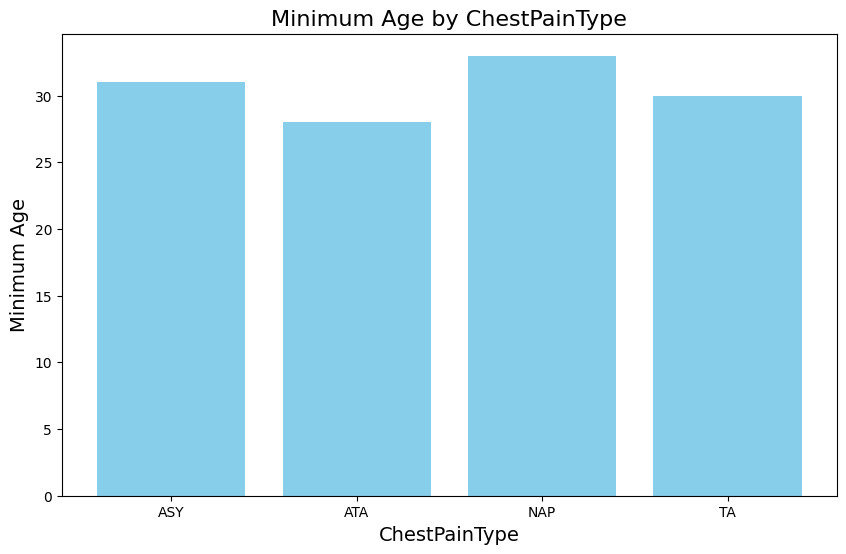

In [64]:
# Calculate the minimum age for each ChestPainType
min_age_by_chestpain = df.groupby("ChestPainType")['Age'].min()

plt.figure(figsize=(10, 6))
plt.bar(min_age_by_chestpain.index, min_age_by_chestpain.values, color='skyblue')
plt.title('Minimum Age by ChestPainType', fontsize=16)
plt.xlabel('ChestPainType', fontsize=14)
plt.ylabel('Minimum Age', fontsize=14)
plt.show()

In [65]:
df.groupby("Age").RestingBP.mean()

Age
28    130.000000
29    130.000000
30    170.000000
31    110.000000
32    110.600000
33    110.000000
34    124.142857
35    126.272727
36    123.666667
37    127.090909
38    120.000000
39    127.333333
40    128.307692
41    120.458333
42    129.166667
43    126.666667
44    125.947368
45    129.222222
46    126.375000
47    132.526316
48    128.000000
49    129.047619
50    135.000000
51    127.382353
52    133.638889
53    131.090909
54    133.568627
55    131.317073
56    133.894737
57    136.368421
58    132.000000
59    141.085714
60    135.483871
61    137.483871
62    134.885714
63    136.833333
64    137.590909
65    141.761905
66    139.461538
67    133.533333
68    140.300000
69    139.461538
70    145.142857
71    131.200000
72    145.750000
73    160.000000
74    141.857143
75    155.333333
76    122.000000
77    124.500000
Name: RestingBP, dtype: float64

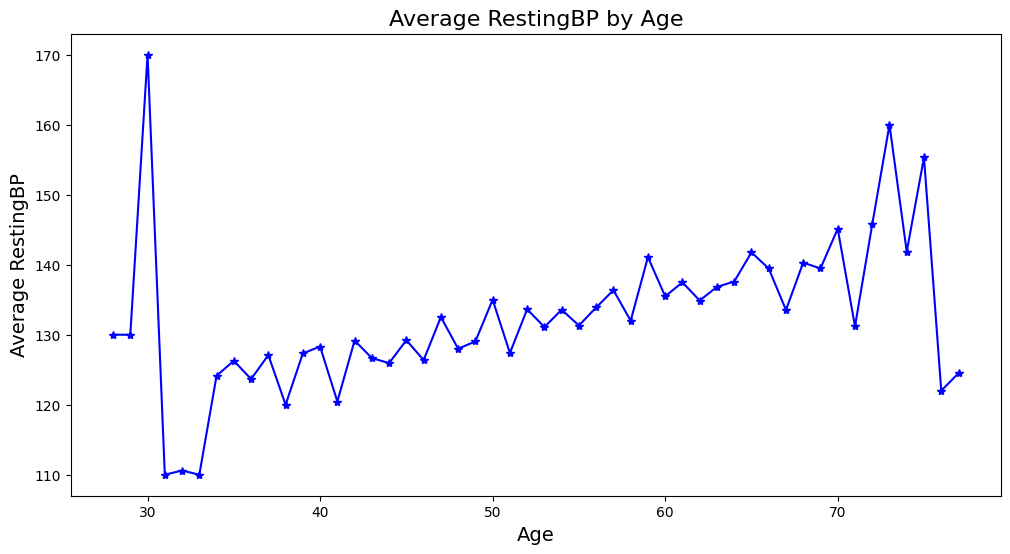

In [66]:
# Calculate the mean RestingBP for each Age
mean_restingbp_by_age = df.groupby("Age")['RestingBP'].mean()

plt.figure(figsize=(12, 6))
plt.plot(mean_restingbp_by_age.index, mean_restingbp_by_age.values, marker='*', linestyle='-', color='b')
plt.title('Average RestingBP by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Average RestingBP', fontsize=14)

plt.show()

In [67]:
df.groupby("Age").Cholesterol.mean()

Age
28    132.000000
29    236.666667
30    237.000000
31    244.500000
32    241.200000
33    272.000000
34    163.285714
35    197.454545
36    190.333333
37    233.727273
38    146.500000
39    239.200000
40    229.384615
41    216.500000
42    212.222222
43    202.333333
44    249.578947
45    229.333333
46    217.166667
47    193.421053
48    228.193548
49    213.476190
50    199.200000
51    181.058824
52    200.277778
53    181.030303
54    231.980392
55    218.463415
56    174.789474
57    202.315789
58    217.285714
59    175.714286
60    173.064516
61    162.580645
62    166.742857
63    157.600000
64    205.318182
65    207.571429
66    179.461538
67    254.866667
68    158.500000
69    156.230769
70    171.714286
71    231.600000
72    137.000000
73      0.000000
74    184.285714
75    246.000000
76    155.000000
77    237.500000
Name: Cholesterol, dtype: float64

In [68]:
df.groupby("FastingBS").Age.mean()

FastingBS
0    52.472934
1    56.897196
Name: Age, dtype: float64

In [69]:
pd.crosstab(df.RestingECG , df.Age)

Age,28,29,30,31,32,33,34,35,36,37,...,68,69,70,71,72,73,74,75,76,77
RestingECG,,,,,,,,,,,,,,,,,,,,,
LVH,1,1,0,0,0,0,1,2,0,1,...,2,4,2,1,2,0,1,0,1,1
Normal,0,2,0,1,5,2,5,7,6,8,...,6,3,3,3,2,0,4,2,0,0
ST,0,0,1,1,0,0,1,2,0,2,...,2,6,2,1,0,1,2,1,1,1


In [70]:
df.groupby("RestingECG").Age.mean()

RestingECG
LVH       56.218085
Normal    51.727273
ST        56.140449
Name: Age, dtype: float64

In [71]:
df.groupby("Age").MaxHR.mean()

Age
28    185.000000
29    177.333333
30    170.000000
31    151.500000
32    152.200000
33    167.500000
34    172.571429
35    158.909091
36    166.500000
37    152.909091
38    149.250000
39    150.800000
40    150.692308
41    154.416667
42    150.833333
43    147.875000
44    154.263158
45    148.277778
46    136.250000
47    139.842105
48    136.161290
49    146.619048
50    139.360000
51    137.970588
52    141.944444
53    131.575758
54    137.294118
55    133.390244
56    128.894737
57    133.631579
58    130.380952
59    134.600000
60    137.580645
61    121.000000
62    121.028571
63    128.933333
64    128.318182
65    125.904762
66    124.846154
67    132.133333
68    136.100000
69    122.307692
70    123.857143
71    128.000000
72    113.750000
73    121.000000
74    116.000000
75    110.666667
76    118.000000
77    136.000000
Name: MaxHR, dtype: float64

In [72]:
pd.crosstab(df.ExerciseAngina , df.Age)

Age,28,29,30,31,32,33,34,35,36,37,...,68,69,70,71,72,73,74,75,76,77
ExerciseAngina,,,,,,,,,,,,,,,,,,,,,
N,1,3,1,1,5,1,7,8,5,10,...,6,7,2,3,2,1,3,1,2,0
Y,0,0,0,1,0,1,0,3,1,1,...,4,6,5,2,2,0,4,2,0,2


In [73]:
pd.crosstab(df.Sex , df.ChestPainType)

ChestPainType,ASY,ATA,NAP,TA
Sex,,,,
F,70,60,53,10
M,424,113,150,36


In [74]:
pd.crosstab(df.Sex , df.ChestPainType , values = df.Age , aggfunc = "mean") 

ChestPainType,ASY,ATA,NAP,TA
Sex,,,,
F,54.257143,49.583333,53.132075,54.2
M,55.073113,49.061947,53.373333,55.0


In [75]:
pd.crosstab(df.Sex , df.RestingBP)

RestingBP,0,80,92,94,95,96,98,100,101,102,...,165,170,172,174,178,180,185,190,192,200
Sex,,,,,,,,,,,,,,,,,,,,,
F,0,0,0,1,1,0,0,4,0,2,...,0,2,0,1,1,5,0,0,0,2
M,1,1,1,1,5,1,1,11,1,1,...,2,12,2,0,2,7,1,2,1,2


In [76]:
df.groupby("Sex").RestingBP.mean()

Sex
F    132.212435
M    132.431535
Name: RestingBP, dtype: float64

In [77]:
df.groupby("Sex").Cholesterol.mean()

Sex
F    241.196891
M    188.031812
Name: Cholesterol, dtype: float64

In [78]:
pd.crosstab(df.Sex , df.FastingBS)

FastingBS,0,1
Sex,,
F,167,26
M,535,188


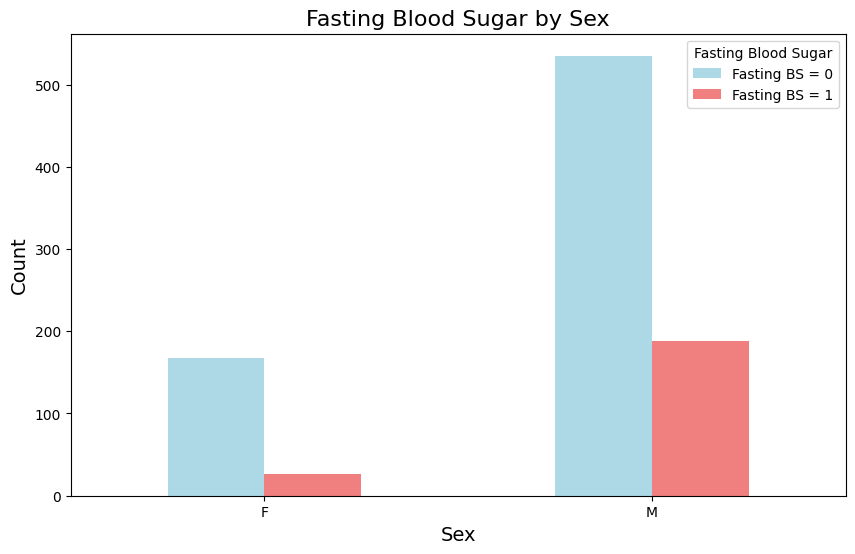

In [79]:
# Create a crosstab to get counts of Sex and FastingBS
crosstab_data = pd.crosstab(df.Sex, df.FastingBS)

crosstab_data.plot(kind='bar', figsize=(10, 6), color=['lightblue', 'lightcoral'])
plt.title('Fasting Blood Sugar by Sex', fontsize=16)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Fasting Blood Sugar', labels=['Fasting BS = 0', 'Fasting BS = 1'])
plt.xticks(rotation = 0)
plt.show()


In [80]:
pd.crosstab(df.Sex , df.RestingECG)

RestingECG,LVH,Normal,ST
Sex,,,
F,47,118,28
M,141,432,150


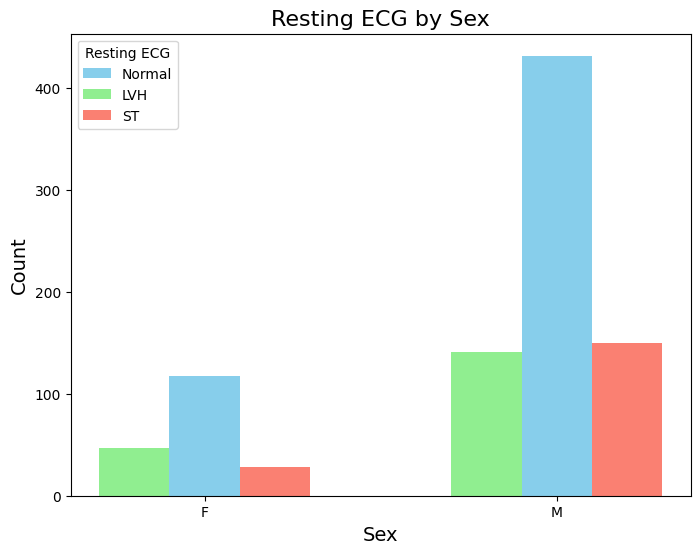

In [81]:
crosstab_data = pd.crosstab(df.Sex, df.RestingECG)
x_labels = np.arange(len(crosstab_data.index))

plt.figure(figsize=(8, 6))
plt.bar(x_labels, crosstab_data['Normal'], width=0.2, color='skyblue', label='Normal')
plt.bar(x_labels - 0.2, crosstab_data['LVH'], width=0.2, color='lightgreen', label='LVH')
plt.bar(x_labels + 0.2, crosstab_data['ST'], width=0.2, color='salmon', label='ST')

plt.title('Resting ECG by Sex', fontsize=16)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(x_labels, crosstab_data.index)
plt.legend(title='Resting ECG')
plt.show()


In [82]:
df.groupby("Sex").MaxHR.mean()

Sex
F    146.139896
M    134.526971
Name: MaxHR, dtype: float64

In [83]:
df.groupby("Sex").MaxHR.max()

Sex
F    192
M    202
Name: MaxHR, dtype: int64

In [84]:
pd.crosstab(df.Sex , df.ExerciseAngina)

ExerciseAngina,N,Y
Sex,,
F,150,43
M,396,327


In [85]:
df.groupby(['Sex'])['RestingECG'].value_counts()

Sex  RestingECG
F    Normal        118
     LVH            47
     ST             28
M    Normal        432
     ST            150
     LVH           141
Name: count, dtype: int64

In [86]:
df.groupby(['Sex'])['ST_Slope'].value_counts()

Sex  ST_Slope
F    Up          111
     Flat         75
     Down          7
M    Flat        384
     Up          283
     Down         56
Name: count, dtype: int64

In [87]:
df.groupby(['ChestPainType'])['RestingBP'].mean()

ChestPainType
ASY    133.212551
ATA    130.624277
NAP    130.960591
TA     136.413043
Name: RestingBP, dtype: float64

In [88]:
df.groupby(['ChestPainType'])['Cholesterol'].mean()

ChestPainType
ASY    187.400810
ATA    233.046243
NAP    197.438424
TA     207.065217
Name: Cholesterol, dtype: float64

In [89]:
pd.crosstab(df.FastingBS , df.ChestPainType ) 

ChestPainType,ASY,ATA,NAP,TA
FastingBS,,,,
0,353,154,162,33
1,141,19,41,13


In [90]:
pd.crosstab(df.ChestPainType , df.RestingECG ) 

RestingECG,LVH,Normal,ST
ChestPainType,,,
ASY,102,282,110
ATA,23,123,27
NAP,47,123,33
TA,16,22,8


In [91]:
df.groupby(['ChestPainType'])['MaxHR'].mean()

ChestPainType
ASY    128.748988
ATA    150.208092
NAP    143.236453
TA     147.891304
Name: MaxHR, dtype: float64

In [92]:
pd.crosstab(df.ChestPainType , df.ExerciseAngina ) 

ExerciseAngina,N,Y
ChestPainType,,
ASY,198,296
ATA,156,17
NAP,152,51
TA,40,6


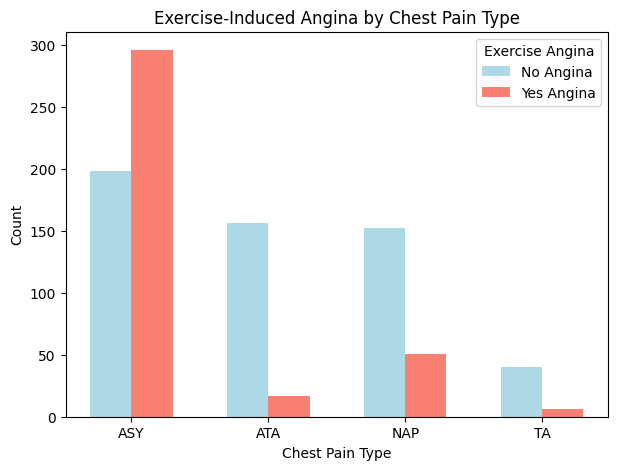

In [93]:
crosstab_data = pd.crosstab(df.ChestPainType, df.ExerciseAngina)

plt.figure(figsize=(7, 5))
x_labels = np.arange(len(crosstab_data))

plt.bar(x_labels - 0.3 / 2, crosstab_data['N'], width=0.3, color='lightblue', label='No Angina')
plt.bar(x_labels + 0.3 / 2, crosstab_data['Y'], width=0.3, color='salmon', label='Yes Angina')
plt.title('Exercise-Induced Angina by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(x_labels, crosstab_data.index)
plt.legend(title='Exercise Angina')
plt.show()

In [94]:
df[(df['RestingBP'] > 140) & (df['Cholesterol'] > 200)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
23,44,M,ATA,150,288,0,Normal,150,Y,3.0,Flat,1
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
39,48,F,ASY,150,227,0,Normal,130,Y,1.0,Flat,0
40,54,F,ATA,150,230,0,Normal,130,N,0.0,Up,0
42,35,M,ATA,150,264,0,Normal,168,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
891,66,F,NAP,146,278,0,LVH,152,N,0.0,Flat,0
893,57,M,ATA,154,232,0,LVH,164,N,0.0,Up,1
899,61,M,ASY,148,203,0,Normal,161,N,0.0,Up,1
901,58,F,ASY,170,225,1,LVH,146,Y,2.8,Flat,1


In [95]:
pd.crosstab(df.FastingBS , df.RestingBP ) 

RestingBP,0,80,92,94,95,96,98,100,101,102,...,165,170,172,174,178,180,185,190,192,200
FastingBS,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,2,0,1,1,12,0,2,...,0,10,1,1,1,9,1,1,1,2
1,0,0,0,0,6,0,0,3,1,1,...,2,4,1,0,2,3,0,1,0,2


In [96]:
pd.crosstab(df.RestingECG , df.RestingBP ) 

RestingBP,0,80,92,94,95,96,98,100,101,102,...,165,170,172,174,178,180,185,190,192,200
RestingECG,,,,,,,,,,,,,,,,,,,,,
LVH,0,0,0,0,0,0,0,2,0,1,...,1,5,0,0,2,1,0,1,1,1
Normal,1,1,1,2,5,0,1,10,1,1,...,1,3,2,1,1,5,1,1,0,2
ST,0,0,0,0,1,1,0,3,0,1,...,0,6,0,0,0,6,0,0,0,1


In [97]:
df[(df['RestingBP'] > 140) & (df['MaxHR'] > 120)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
23,44,M,ATA,150,288,0,Normal,150,Y,3.0,Flat,1
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat,1
34,43,F,ATA,150,186,0,Normal,154,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
893,57,M,ATA,154,232,0,LVH,164,N,0.0,Up,1
899,61,M,ASY,148,203,0,Normal,161,N,0.0,Up,1
901,58,F,ASY,170,225,1,LVH,146,Y,2.8,Flat,1
905,67,M,NAP,152,212,0,LVH,150,N,0.8,Flat,1


In [98]:
pd.crosstab(df.RestingBP , df.ExerciseAngina ) 

ExerciseAngina,N,Y
RestingBP,,
0,1,0
80,0,1
92,0,1
94,1,1
95,5,1
...,...,...
180,5,7
185,0,1
190,1,1


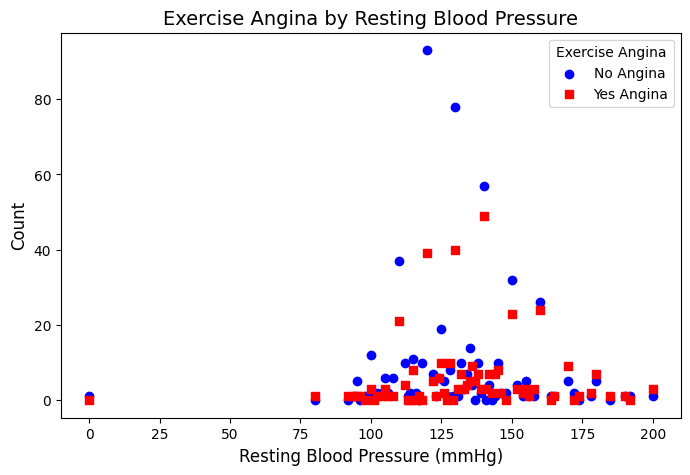

In [99]:
crosstab_data = pd.crosstab(df.RestingBP, df.ExerciseAngina)

plt.figure(figsize=(8, 5))
plt.scatter(crosstab_data.index, crosstab_data['N'], marker='o', color='blue', label='No Angina')
plt.scatter(crosstab_data.index, crosstab_data['Y'], marker='s', color='red', label='Yes Angina')

plt.title('Exercise Angina by Resting Blood Pressure', fontsize=14)
plt.xlabel('Resting Blood Pressure (mmHg)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Exercise Angina')

plt.show()


In [100]:
df.groupby(['FastingBS'])['Cholesterol'].mean()

FastingBS
0    215.141026
1    147.051402
Name: Cholesterol, dtype: float64

In [101]:
pd.crosstab(df.RestingECG , df.Cholesterol ) 

Cholesterol,0,85,100,110,113,117,123,126,129,131,...,412,417,458,466,468,491,518,529,564,603
RestingECG,,,,,,,,,,,,,,,,,,,,,
LVH,12,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
Normal,105,1,2,1,0,1,0,2,1,1,...,1,0,1,1,1,1,1,1,0,1
ST,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
df.groupby(['RestingECG'])['Cholesterol'].mean()

RestingECG
LVH       236.946809
Normal    196.085455
ST        169.129213
Name: Cholesterol, dtype: float64

In [103]:
df.groupby(['ExerciseAngina'])['Cholesterol'].mean()

ExerciseAngina
N    202.245421
Y    194.789189
Name: Cholesterol, dtype: float64

In [104]:
pd.crosstab(df.RestingECG , df.FastingBS )

FastingBS,0,1
RestingECG,,
LVH,146,42
Normal,439,111
ST,117,61


In [105]:
pd.crosstab(df.ExerciseAngina , df.FastingBS ) 

FastingBS,0,1
ExerciseAngina,,
N,430,116
Y,272,98


In [106]:
df.groupby(['FastingBS'])['MaxHR'].mean()

FastingBS
0    138.873219
1    130.742991
Name: MaxHR, dtype: float64

In [107]:
df.groupby(['RestingECG'])['MaxHR'].mean()

RestingECG
LVH       143.117021
Normal    137.578182
ST        128.617978
Name: MaxHR, dtype: float64

In [108]:
df.groupby(['RestingECG'])['ExerciseAngina'].value_counts()

RestingECG  ExerciseAngina
LVH         N                 115
            Y                  73
Normal      N                 344
            Y                 206
ST          Y                  91
            N                  87
Name: count, dtype: int64

In [109]:
df.groupby(['ExerciseAngina'])['RestingECG'].value_counts()

ExerciseAngina  RestingECG
N               Normal        344
                LVH           115
                ST             87
Y               Normal        206
                ST             91
                LVH            73
Name: count, dtype: int64

In [110]:
pd.crosstab(df.ExerciseAngina , df.MaxHR ) 

MaxHR,67,69,70,71,72,73,77,78,80,82,...,184,185,186,187,188,190,192,194,195,202
ExerciseAngina,,,,,,,,,,,,,,,,,,,,,
N,1,1,1,1,0,1,1,1,0,1,...,4,4,1,1,2,2,1,1,1,1
Y,0,0,0,0,2,0,0,0,2,2,...,0,0,1,0,0,0,0,0,0,0


In [111]:
df[df['Age'] > 50]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
15,54,F,ATA,120,273,0,Normal,150,N,1.5,Flat,0
18,60,M,ASY,100,248,0,Normal,125,N,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1


In [112]:
df[df['ChestPainType'] == 'ASY']

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1
16,38,M,ASY,110,196,0,Normal,166,N,0.0,Flat,1
18,60,M,ASY,100,248,0,Normal,125,N,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1


In [113]:
df[df['Age'] > 60]['HeartDisease'].value_counts(normalize=True) * 100

HeartDisease
1    72.850679
0    27.149321
Name: proportion, dtype: float64

In [114]:
df.groupby(['Sex'])['HeartDisease'].value_counts()

Sex  HeartDisease
F    0               143
     1                50
M    1               456
     0               267
Name: count, dtype: int64

In [115]:
df.groupby(['ChestPainType'])['HeartDisease'].value_counts()

ChestPainType  HeartDisease
ASY            1               390
               0               104
ATA            0               149
               1                24
NAP            0               131
               1                72
TA             0                26
               1                20
Name: count, dtype: int64

In [116]:
df.groupby(['ExerciseAngina'])['HeartDisease'].value_counts()

ExerciseAngina  HeartDisease
N               0               355
                1               191
Y               1               315
                0                55
Name: count, dtype: int64

In [117]:
df.groupby(['HeartDisease']).Cholesterol.mean()

HeartDisease
0    227.121951
1    176.636364
Name: Cholesterol, dtype: float64

In [118]:
df.groupby(['HeartDisease']).RestingBP.mean()

HeartDisease
0    130.180488
1    134.171937
Name: RestingBP, dtype: float64

In [119]:
df.groupby(['HeartDisease']).MaxHR.mean()

HeartDisease
0    148.151220
1    127.916996
Name: MaxHR, dtype: float64

In [120]:
df[(df['Cholesterol'] > 200) & (df['Age'] > 50) & (df['ExerciseAngina'] == "Y") & (df['HeartDisease'] == 1)] 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
36,65,M,ASY,140,306,1,Normal,87,Y,1.5,Flat,1
41,54,F,NAP,130,294,0,ST,100,Y,0.0,Flat,1
59,52,M,ASY,112,342,0,ST,96,Y,1.0,Flat,1
68,52,M,ASY,160,246,0,ST,82,Y,4.0,Flat,1
70,57,M,ATA,140,265,0,ST,145,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
888,52,M,ASY,128,204,1,Normal,156,Y,1.0,Flat,1
895,57,M,ASY,110,335,0,Normal,143,Y,3.0,Flat,1
897,55,F,ASY,128,205,0,ST,130,Y,2.0,Flat,1
901,58,F,ASY,170,225,1,LVH,146,Y,2.8,Flat,1


In [121]:
df.groupby('ChestPainType').agg({'RestingBP': 'mean', 'FastingBS': 'mean'})

,RestingBP,FastingBS
ChestPainType,,
ASY,133.212551,0.285425
ATA,130.624277,0.109827
NAP,130.960591,0.201970
TA,136.413043,0.282609


In [122]:
df[(df['RestingBP'] > 130) & (df['Age'] > 50) & (df['ExerciseAngina'] == "Y") & (df['RestingECG'] == "ST" ) ] 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
68,52,M,ASY,160,246,0,ST,82,Y,4.0,Flat,1
70,57,M,ATA,140,265,0,ST,145,Y,1.0,Flat,1
132,56,M,ASY,170,388,0,ST,122,Y,2.0,Flat,1
133,56,M,ASY,150,230,0,ST,124,Y,1.5,Flat,1
189,53,M,ASY,180,285,0,ST,120,Y,1.5,Flat,1
278,57,F,ASY,180,347,0,ST,126,Y,0.8,Flat,0
348,69,M,ASY,137,0,0,ST,104,Y,1.6,Flat,1
367,68,M,ASY,135,0,0,ST,120,Y,0.0,Up,1
380,60,M,ASY,160,0,0,ST,99,Y,0.5,Flat,1


In [123]:
(df[(df['Sex'] == 'M') & (df['Age'] > 50) & (df['ChestPainType'] == 'TA')]['Cholesterol'] > 200).mean() * 100

68.0

In [124]:
# incidence of high resting blood pressure
((df[(df['Sex'] == 'F') & (df['Cholesterol'] > 200) & (df['ExerciseAngina'] == "Y")]['RestingBP'] > 130).mean()) * 100


# incidence of exercise-induced angina
((df[(df['Sex'] == 'F') & (df['Cholesterol'] > 200) & (df['RestingBP'] > 130)]['ExerciseAngina'] == "Y").mean()) * 100

36.92307692307693

# thank you 😊😊